# About The Data
HR departments of companies would want to predict how likely are their employees decide to leave the company. Using different paremeters like Education, Experience and salary we can identify the chances of them leaving or not. We will use this dataset to create a regression model  to predict the likelihood of them leaving the company and also analysing the data to create graphs and charts.

In [828]:
!pip install requests
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [829]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [830]:
min_mem_size=6 
run_time=222

In [831]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [832]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16727 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf8bp_vw5
  JVM stdout: /tmp/tmpf8bp_vw5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf8bp_vw5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16727
Connecting to H2O server at http://127.0.0.1:16727 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_8x6vd3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [833]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 2 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_1832rt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.564 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [834]:
url = "https://raw.githubusercontent.com/SathwikHegde/Data-Science/main/AutoML-H20.ai/Dataset/Datasets-Employee/Employee.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [835]:
df.head()

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Churn
Bachelors,2017,Bangalore,3,34,Male,No,0,0,nan
Bachelors,2013,Pune,1,28,Female,No,3,1,nan
Bachelors,2014,New Delhi,3,38,Female,No,2,0,nan
Masters,2016,Bangalore,3,27,Male,No,5,1,nan
Masters,2017,Pune,3,24,Male,Yes,2,1,nan
Bachelors,2016,Bangalore,3,22,Male,No,0,0,nan
Bachelors,2015,New Delhi,3,38,Male,No,0,0,nan
Bachelors,2016,Bangalore,3,34,Female,No,2,1,nan
Bachelors,2016,Pune,3,23,Male,No,1,0,nan
Masters,2017,New Delhi,2,37,Male,No,2,0,nan


In [836]:
df.types

{'Age': 'int',
 'Churn': 'int',
 'City': 'enum',
 'Education': 'enum',
 'EverBenched': 'enum',
 'ExperienceInCurrentDomain': 'int',
 'Gender': 'enum',
 'JoiningYear': 'int',
 'LeaveOrNot': 'int',
 'PaymentTier': 'int'}

In [837]:
df.describe()

Rows:4653
Cols:10




,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Churn
type,enum,int,enum,int,int,enum,enum,int,int,int
mins,,2012.0,,1.0,22.0,,,0.0,0.0,NaN
mean,,2015.0629701267999,,2.6982591876208906,29.393294648613786,,,2.905652267354396,0.3438641736514077,0.0
maxs,,2018.0,,3.0,41.0,,,7.0,1.0,NaN
sigma,,1.8633768286863306,,0.5614354643364909,4.826087009126051,,,1.5582403309268564,0.47504747514881035,-0.0
zeros,,0,,0,0,,,355,3053,0
missing,0,0,0,0,0,0,0,0,0,4653
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0.0,nan
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,1.0,nan
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,0.0,nan


In [838]:
df.shape

(4653, 10)

In [839]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [840]:
print(df_train.shape)
print(df_test.shape)

(3751, 10)
(902, 10)


In [841]:
df_train.head()

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Churn
Bachelors,2017,Bangalore,3,34,Male,No,0,0,nan
Masters,2016,Bangalore,3,27,Male,No,5,1,nan
Masters,2017,Pune,3,24,Male,Yes,2,1,nan
Bachelors,2016,Bangalore,3,22,Male,No,0,0,nan
Bachelors,2015,New Delhi,3,38,Male,No,0,0,nan
Bachelors,2016,Bangalore,3,34,Female,No,2,1,nan
Bachelors,2016,Pune,3,23,Male,No,1,0,nan
Masters,2012,Bangalore,3,27,Male,No,5,1,nan
Bachelors,2016,Pune,3,34,Male,No,3,0,nan
Bachelors,2016,Bangalore,3,39,Male,No,2,0,nan


In [842]:
# Set the features and target
X=df.columns
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'Churn']


In [843]:
# Set target and predictor variables
# y ='churn'
y_numeric ='LeaveOrNot'
# X.remove(y) 
X.remove(y_numeric) 
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'Churn']


In [844]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [845]:
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |
02:53:40.979: _train param, Dropping bad and constant columns: [Churn]
02:53:40.979: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

███
02:53:50.3: _train param, Dropping bad and constant columns: [Churn]
02:53:50.3: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
02:53:52.12: _train param, Dropping bad and constant columns: [Churn]
02:53:52.13: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
02:53:57.15: _train param, D

# 1) Does the model make sense? 
Ans. In the below table we can see the mean_residual_deviance, rmse, mse, mae, rmsle to check the performance if the model.

1) Root Mean square error (Rmse):  It is always positive, and a lower value indicates better performance. Ideal value would be 0 and our values are very close to 0.

2) Mean square error (MSE):  is always positive and a value closer to 0 or a lower value is better. In our model our mse is just a little over 0, so our model is better.

3) Mean absolute error (MAE): The value is near to 0 so we can say better performaance

4) Root mean squared log error (RMSLE): The value is near to 0 so we can say better performaance

In [846]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_4_AutoML_12_20220214_25340,0.114069,0.337741,0.114069,0.231706,0.237495
StackedEnsemble_AllModels_3_AutoML_12_20220214_25340,0.114237,0.337989,0.114237,0.232045,0.23762
GBM_grid_1_AutoML_12_20220214_25340_model_12,0.11466,0.338615,0.11466,0.232051,0.238112
StackedEnsemble_AllModels_2_AutoML_12_20220214_25340,0.115659,0.340087,0.115659,0.237423,0.239192
GBM_5_AutoML_12_20220214_25340,0.115866,0.340391,0.115866,0.2431,0.239622
StackedEnsemble_BestOfFamily_3_AutoML_12_20220214_25340,0.115954,0.34052,0.115954,0.237455,0.239465
XGBoost_grid_1_AutoML_12_20220214_25340_model_30,0.11597,0.340544,0.11597,0.238607,0.23979
StackedEnsemble_AllModels_1_AutoML_12_20220214_25340,0.116441,0.341235,0.116441,0.238779,0.240256
StackedEnsemble_BestOfFamily_2_AutoML_12_20220214_25340,0.116732,0.341661,0.116732,0.237724,0.240898
GBM_2_AutoML_12_20220214_25340,0.116793,0.34175,0.116793,0.242139,0.240809


In [847]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_12_20220214_25340_model_12': 2,
 'GLM_1_AutoML_12_20220214_25340': 75,
 'StackedEnsemble_AllModels_3_AutoML_12_20220214_25340': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_12_20220214_25340': 0}

In [848]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [849]:
best_model.algo

'gbm'

In [850]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

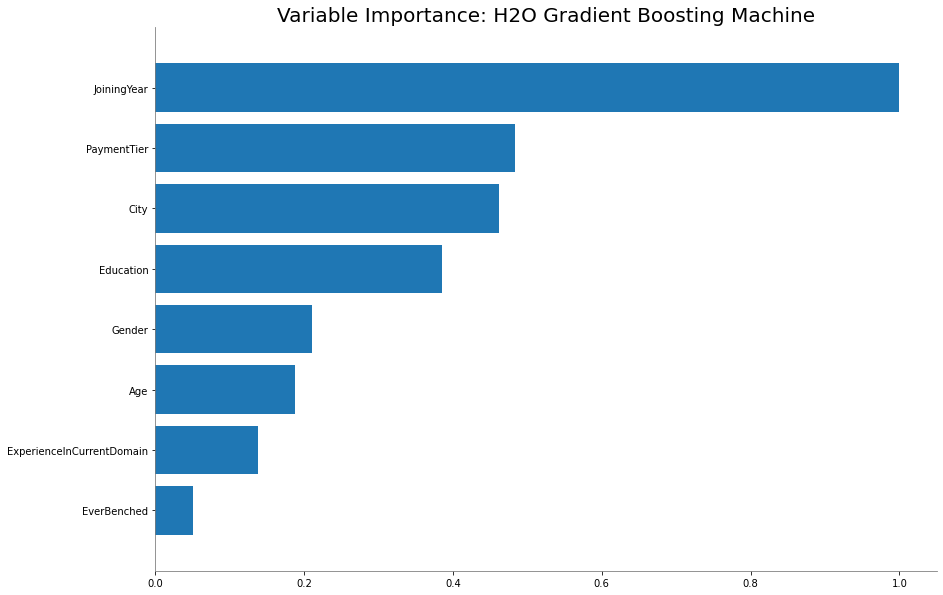

<Figure size 432x288 with 0 Axes>

In [851]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

# 2) In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.
Ans. The most significant variable is
1) "Joining Year".
2) Payment Tier
3)City
4) Education
5) Gender
6) Age
7) Experience in Current Domain
8) Ever Benched

75
glm


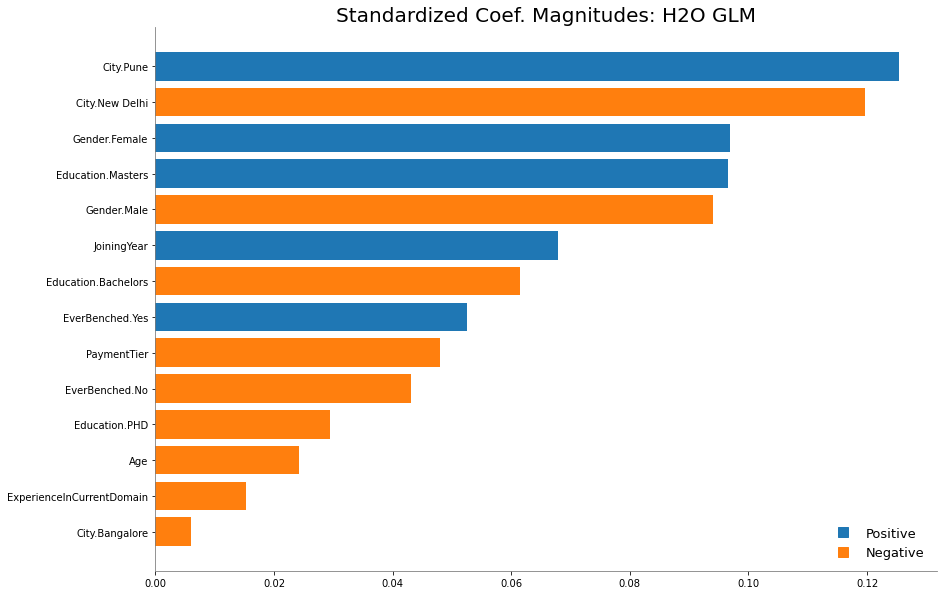

In [852]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [853]:
print(best_model.rmse(train = True))

0.3035634757266774


In [854]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [855]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.10516271131476491,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.32428800673901725}

In [856]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [857]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,1.004875
1,0.211164
2,0.210290
3,0.979776
4,-0.002040


In [858]:
y_test=h2o.as_list(df_test[y_numeric])
y_test[0:5]

,LeaveOrNot
0,1
1,0
2,0
3,1
4,0


In [859]:
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'Churn']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_12_20220214_25340_model_12 on column 'Education'.


,education,mean_response,stddev_response,std_error_mean_response
0,Bachelors,0.320849,0.341500,0.005006
1,Masters,0.596086,0.268275,0.003933
2,PHD,0.227299,0.266848,0.003912


[]

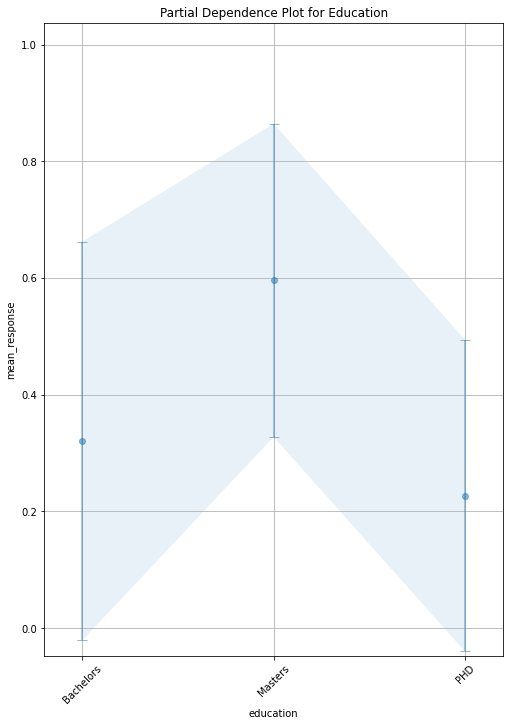

In [860]:
best_model.partial_plot(df, cols=['Education'])

# 2) Is the relationship significant? 
Ans.We will use One Sample T-test to identify the relationship significance, to find out the significance of our most significant variable joining year.

In [894]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [895]:
#Calculatin p-value for 1 independent variable "Age"
df["JoiningYear"].mean()

[2015.0629701267999]

In [898]:
#convert list to 1d array
ages=df["JoiningYear"]
pd=h2o.as_list(df)
joining_year_arr=pd["JoiningYear"].tolist()
print(joining_year_arr)

[2017, 2013, 2014, 2016, 2017, 2016, 2015, 2016, 2016, 2017, 2012, 2016, 2018, 2016, 2012, 2017, 2014, 2014, 2015, 2016, 2012, 2017, 2017, 2015, 2017, 2013, 2016, 2015, 2013, 2017, 2013, 2014, 2018, 2016, 2017, 2014, 2012, 2018, 2017, 2014, 2015, 2017, 2013, 2014, 2015, 2014, 2012, 2013, 2017, 2013, 2017, 2015, 2016, 2014, 2017, 2013, 2016, 2014, 2013, 2017, 2013, 2015, 2013, 2014, 2016, 2018, 2013, 2014, 2015, 2017, 2018, 2017, 2014, 2014, 2017, 2015, 2014, 2017, 2012, 2015, 2017, 2013, 2016, 2017, 2015, 2016, 2017, 2015, 2014, 2012, 2018, 2015, 2017, 2013, 2014, 2018, 2016, 2014, 2014, 2015, 2012, 2013, 2017, 2015, 2017, 2015, 2015, 2017, 2013, 2015, 2015, 2017, 2013, 2012, 2017, 2014, 2015, 2013, 2017, 2017, 2012, 2015, 2015, 2012, 2014, 2014, 2013, 2015, 2018, 2013, 2017, 2013, 2016, 2017, 2017, 2018, 2017, 2012, 2017, 2013, 2013, 2017, 2017, 2016, 2013, 2015, 2014, 2016, 2013, 2015, 2018, 2016, 2012, 2014, 2016, 2012, 2013, 2012, 2015, 2016, 2014, 2013, 2017, 2016, 2015, 2014, 201

In [899]:
#lets take sample
sample_size=100
sample_age = np.random.choice(joining_year_arr,sample_size)

In [900]:
ttest,p_value=stats.ttest_1samp(joining_year_arr,30)
print(p_value)

0.0


In [901]:
if p_value < 0.05:  #alpha value is 0.05
  print("we are rejecting the null hypothesis")
else:
  print("we are accepting the null hypothesis")

we are rejecting the null hypothesis


In [867]:
#Assigning variables to X and y
df
X = df.drop(['Churn'], axis=1)
X = df[['JoiningYear','Education','City','Gender','EverBenched','PaymentTier', 'ExperienceInCurrentDomain','Age']]
y = df['LeaveOrNot']
X = h2o.as_list(X)
y = h2o.as_list(y)

In [868]:
import statsmodels.api as sm
#First we will convert the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
X['JoiningYear']  = LabelEncoder().fit_transform(X['JoiningYear'])
X['Education']  = LabelEncoder().fit_transform(X['Education'])
X['City']  = LabelEncoder().fit_transform(X['City'])
X['Gender']  = LabelEncoder().fit_transform(X['Gender'])
X['EverBenched']  = LabelEncoder().fit_transform(X['EverBenched'])
X

,JoiningYear,Education,City,Gender,EverBenched,PaymentTier,ExperienceInCurrentDomain,Age
0,5,0,0,1,0,3,0,34
1,1,0,2,0,0,1,3,28
2,2,0,1,0,0,3,2,38
3,4,1,0,1,0,3,5,27
4,5,1,2,1,1,3,2,24
...,...,...,...,...,...,...,...,...
4648,1,0,0,0,0,3,4,26
4649,1,1,2,1,0,2,2,37
4650,6,1,1,1,0,3,5,27
4651,0,0,0,1,1,3,2,30


# 1) Is the relationship significant? 
Ans.After fitting the model, we can see that based on the p-values of the variables the relationship is significant.

In [869]:
#fit a OLS model with intercept on Dependent Variables
X = sm.add_constant(X)

# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             LeaveOrNot   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     82.30
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          8.03e-128
Time:                        02:57:28   Log-Likelihood:                -2829.9
No. Observations:                4653   AIC:                             5678.
Df Residuals:                    4644   BIC:                             5736.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 4) In the multivariate models are predictor variables independent of all the other predictor variables? 
Ans. Yes the predictor variables are independent of all the other predictor variables, since there is no colinearity between them as shown in the pvalue of all the variables.

# 5) In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.
Ans. The most significant variable is "Joining Year".

# 8) Which independent variables are significant? 
Ans. The regression output example above shows that the 'JoiningYear','City','Gender','EverBenched','PaymentTier','Age' predictor variables are statistically significant because their p-values equal 0.000. On the other hand, Education and ExperienceInCurrentDomain are not statistically significant because its p-value (0.062) and (0.051) respectibely are greater than the usual significance level of 0.05.

# 3)Is there any multicollinearity in the model? 
We have used corelation table and graph to see the collinearity betwwen the variables. As per the values n the table none of them are close to 1, which shows that the predictor variables are not corelated.

The variance inflation factor (VIF) also identifies correlation between independent variables and the strength of that correlation.(Done in Q2 below)

In [870]:
# corelation between all the independent variables
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()

,JoiningYear,Education,City,Gender,EverBenched,PaymentTier,ExperienceInCurrentDomain,Age
JoiningYear,1.000000,0.142670,0.051441,-0.012213,0.049353,-0.096078,-0.036525,0.013165
Education,0.142670,1.000000,0.149903,-0.010889,-0.052249,-0.140741,-0.004463,-0.010611
City,0.051441,0.149903,1.000000,-0.168546,-0.007046,-0.295884,-0.009925,-0.030706
Gender,-0.012213,-0.010889,-0.168546,1.000000,0.019653,0.235119,0.008745,-0.003866
EverBenched,0.049353,-0.052249,-0.007046,0.019653,1.000000,0.019207,0.001408,-0.016135
PaymentTier,-0.096078,-0.140741,-0.295884,0.235119,0.019207,1.000000,0.018314,0.007631
ExperienceInCurrentDomain,-0.036525,-0.004463,-0.009925,0.008745,0.001408,0.018314,1.000000,-0.134643
Age,0.013165,-0.010611,-0.030706,-0.003866,-0.016135,0.007631,-0.134643,1.000000


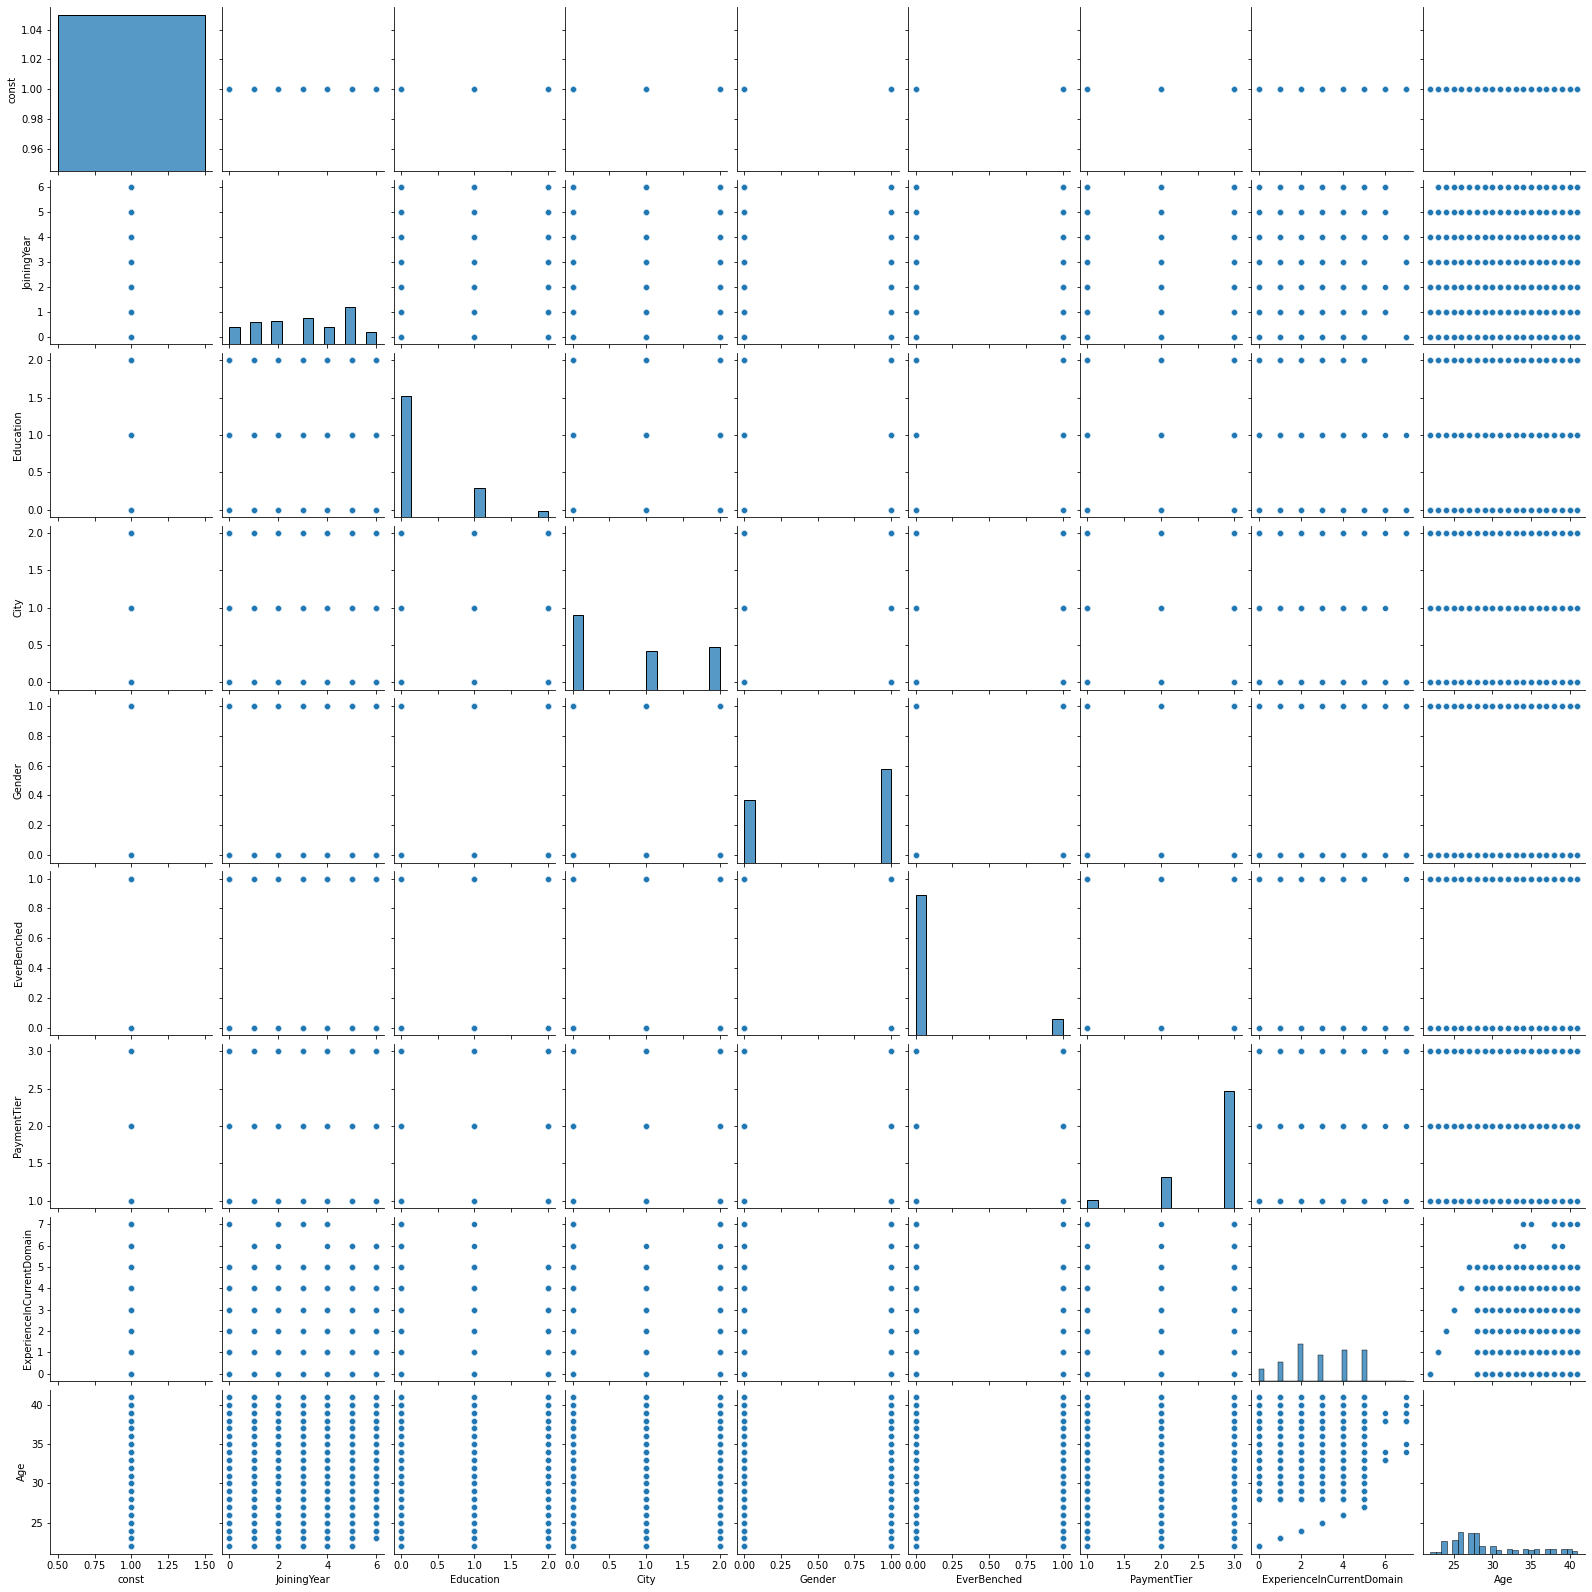

In [902]:
sns.pairplot(X)

# Linear Regression using statsmodels

In [871]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [872]:
import statsmodels.api as sm
#First we will convert the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
X['JoiningYear']  = LabelEncoder().fit_transform(X['JoiningYear'])
X['Education']  = LabelEncoder().fit_transform(X['Education'])
X['City']  = LabelEncoder().fit_transform(X['City'])
X['Gender']  = LabelEncoder().fit_transform(X['Gender'])
X['EverBenched']  = LabelEncoder().fit_transform(X['EverBenched'])

In [873]:
# Split the data into train and test with 70% data being used for training
# X = X.loc[:, X.columns != 'LeaveOrNot']
# y = y.loc[:, 'LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [874]:
# import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)
X_with_constant = X_with_constant.to_numpy()
model = sm.OLS(y_train, X_with_constant)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [875]:
results = model.fit()
results.params

const    0.586107
x1       0.035638
x2       0.024914
x3       0.073564
x4      -0.162310
x5       0.126170
x6      -0.083253
x7      -0.010110
x8      -0.002567
dtype: float64

In [876]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             LeaveOrNot   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     51.90
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.54e-79
Time:                        02:57:28   Log-Likelihood:                -2003.7
No. Observations:                3257   AIC:                             4025.
Df Residuals:                    3248   BIC:                             4080.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5861      0.070      8.353      0.0

In [877]:
#calculate how good the model is by calculating the residual
X = X.loc[:, X.columns != 'LeaveOrNot']
y = y.loc[:, 'LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
residual = y_test - y_pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 2) Are any model assumptions violated? 
Ans. We have use different Assumptions of linear regression to check if they are violated.

In [878]:
#1) Multicolinearity
#Ans. Since all the feature values are below 5 we can conclude that there is no multicolinearity
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,const,JoiningYear,Education,City,Gender,EverBenched,PaymentTier,ExperienceInCurrentDomain,Age
vif,79.793746,1.031985,1.054529,1.127983,1.072032,1.006265,1.157219,1.019442,1.020392


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


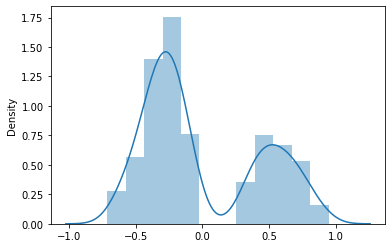

In [879]:
#2) Normality of Residual
#The plot is between 0.5->1.0 and -0.5->0.0, we can assume that the distribution is near normal.
import seaborn as sns
sns.distplot(residual)

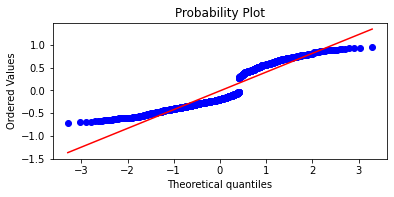

In [880]:
# most of the Observed and the Theoritical plots fall on the same line, which shows that it is a normal distiribution

import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [881]:
#The mean value is very less, which is safe enough to say that distirbution is near normal
np.mean(residual)

-0.009931873406140225

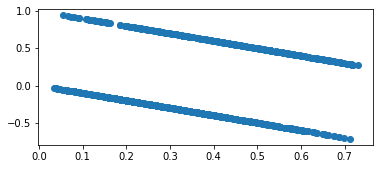

In [882]:
##3)Homoscedasticity
## Since there is a pattern here we can say that there might be a violation here.
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

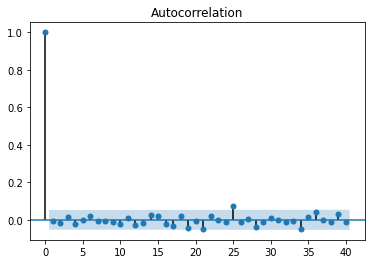

In [883]:
##3)No autocorrelation of residuals
#Ans. No value exceeds the threshold of the significance corelation, so we can say that there is no corelation between the residuals.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

# 7) Does regularization help? 
Ans. First we will do the linear regression on the model and then compare it with ridge and lasso *regression*.

Linear Regression Mean:-0.198792893204153
Ridge Regression Mean:-0.1987819916022421
Lasso Regression Mean:-0.198792893204153

Since there is not much difference between the means of Linear, Ridge and Lasso, we can conclude that the regularization is not required.







In [884]:
#Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.198792893204153


In [885]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02491e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.01076e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.29598e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.54098e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [886]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.1987819916022421


In [887]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.198792893204153


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


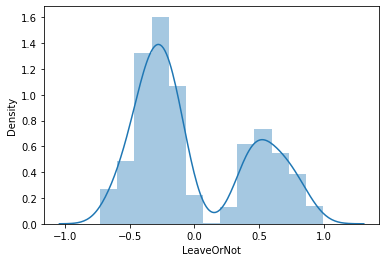

In [888]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


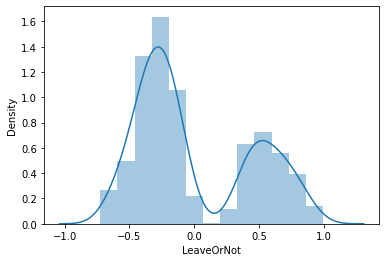

In [889]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

# 9)  Which hyperparameters are important? 
Ans. Here we tried to perform the GridSearchCV to find out the best hyperparameters and we can conclude that below are the best HyperParameters:

Output:
Accuracy:0.8360200039268678

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

In [891]:
classifier= ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [1,2,3,4,5],
    "criterion": ["gini","entropy"]
    }

In [892]:
from sklearn import model_selection
from sklearn import ensemble
model = model_selection.GridSearchCV(
    estimator= classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
)

In [893]:
model.fit(X,y)
print(model.best_score_) 
print(model.best_estimator_.get_params()) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.723 total time=   1.4s
[CV 2/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.733 total time=   0.4s
[CV 3/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.690 total time=   0.4s
[CV 4/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.698 total time=   0.4s
[CV 5/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.744 total time=   0.4s
[CV 1/5; 2/50] START criterion=gini, max_de

# Cite:
Assumptions of Linear Regression:Feb 3, 2021:DATAtab
https://www.youtube.com/watch?v=sDrAoR17pNM&ab_channel=DATAtab

Verifying the Assumptions of Linear Regression in Python:Dec 7, 2019:
Bhavesh Bhatt
https://www.youtube.com/watch?v=rw84t7QU2O0&ab_channel=BhaveshBhatt

Tutorial 28-MultiCollinearity In Linear Regression- Part 2:
Mar 29, 2020:Krish Naik
https://www.youtube.com/watch?v=NAPhUDjgG_s&ab_channel=KrishNaik

Tutorial 33- P Value,T test, Correlation Implementation with Python- Hypothesis Testing
Jan 23, 2020:Krish Naik
https://www.youtube.com/watch?v=4-rxTA_5_xA&ab_channel=KrishNaik

Tutorial 28- Ridge and Lasso Regression using Python and Sklearn
Krish Naik
https://www.youtube.com/watch?v=0yI0-r3Ly40&ab_channel=KrishNaik

author = {Krish Naik.},
  title = {Lassoand Regression},
  Date={Dec 11, 2019}
Lassoand Regression.ipynb
https://github.com/krishnaik06/RegressionandLasso/blob/master/Lassoand%20Regression.ipynb

Hyperparameter Optimization: This Tutorial Is All You Need
Abhishek Thakur:Jul 19, 2020
https://www.youtube.com/watch?v=5nYqK-HaoKY&ab_channel=AbhishekThakur

author = {Krish Naik},
  title = {Hyper Parameter Optimization},
  Date={Jul 23, 2020}
https://github.com/krishnaik06/All-Hyperparamter-Optimization/blob/master/Hyper%20Parameter%20Optimization.ipynb

author = {Akhilendra},
  title = {
Evaluation Metrics for Regression models- MAE Vs MSE Vs RMSE vs RMSLE},
  Date={March 20, 2019}
https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/

